# PS2-1: Training Stability of Logistic Regression

## Introduction

The code in src/p01_lr.py trains a logistic regression algorithm on two different datasets, A and B in /data/ds1_{a/b}.csv. This problem investigates the difference in performance of the model on the two datasets.

## (A)
#### What is the main difference in training the model on dataset A vs B?

The training converges on dataset A while it seems to fail to converge on dataset B.

## (B)
#### Provide an explanation for the difference in behavior between the two datasets.

First, we make a plot of both datasets.


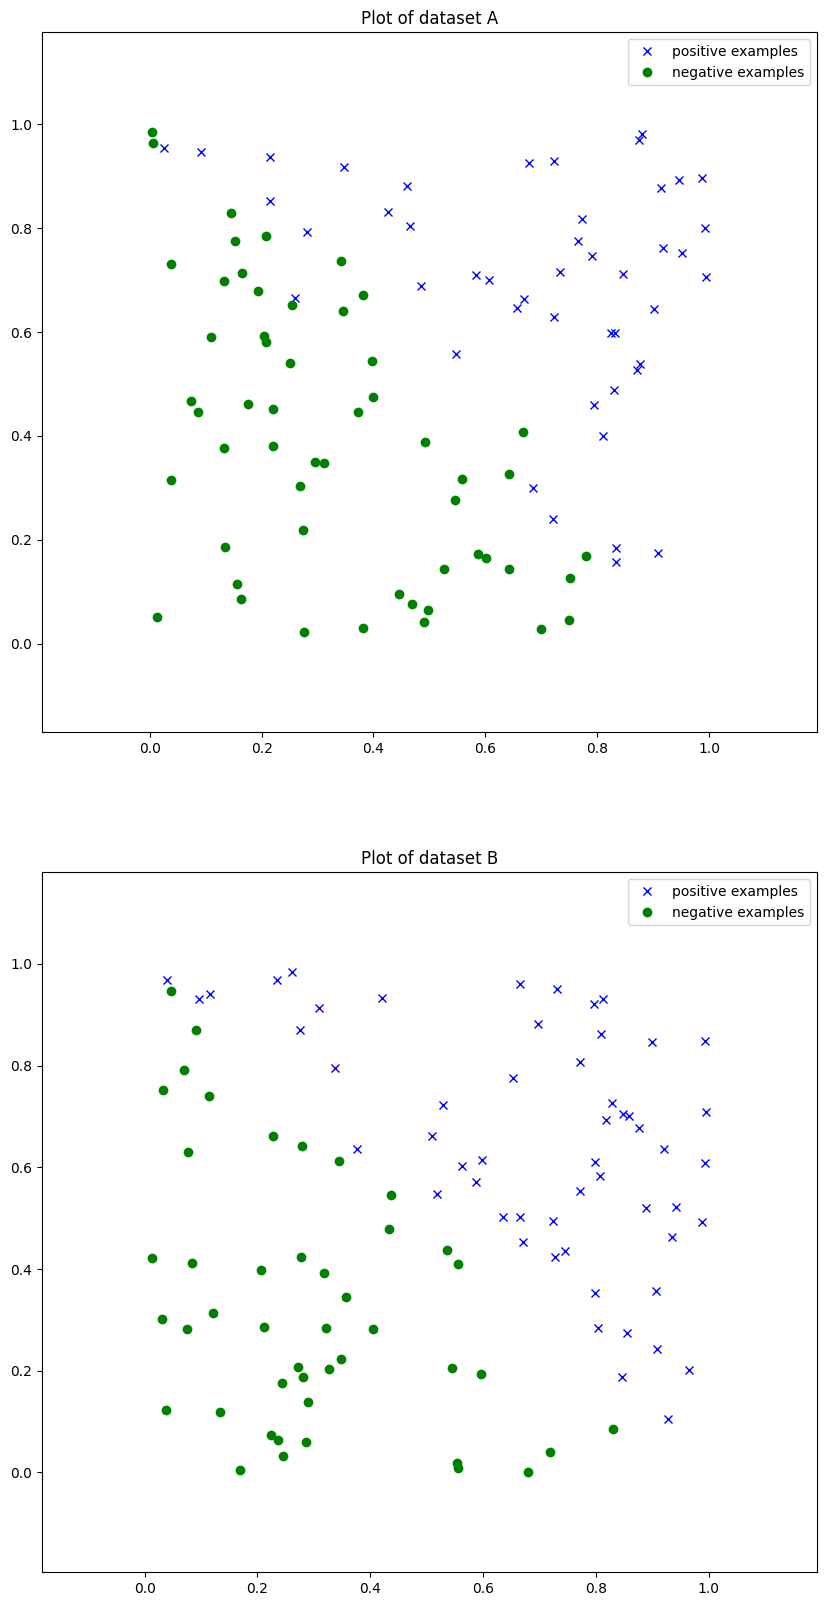

In [10]:
from src import util
import matplotlib.pyplot as plt
import numpy as np

Xa , Ya = util.load_csv('./data/ds1_a.csv')
Xb , Yb = util.load_csv('./data/ds1_b.csv')



# Find the spread of the x_0 coordinate in both datasets.
x0a_spread = Xa[:,0].max() - Xa[:,0].min()
x1a_spread = Xa[:,1].max() - Xa[:,1].min()

x0b_spread = Xb[:,0].max() - Xb[:,0].min()
x1b_spread = Xb[:,1].max() - Xb[:,1].min()

# Calculate 20% of the spread as margin on either side 

# Calculate 20% of the spread as margin on either side 
x0a_margin = x0a_spread / 5
x1a_margin = x1a_spread / 5 


x0b_margin = x0b_spread / 5
x1b_margin = x1b_spread / 5 


fig , axes = plt.subplots(nrows=2,figsize=(10,20))
axa , axb = axes

axa.set_title('Plot of dataset A')
# Set the x and y ranges
axa.set_xlim(Xa[:,0].min() - x0a_margin , Xa[:,0].max() + x0a_margin)
axa.set_ylim(Xa[:,1].min() - x1a_margin , Xa[:,1].max() + x1a_margin)


axa.plot(Xa[Ya == 1, 0], Xa[Ya == 1, 1], 'bx', linewidth=2, label='positive examples')
axa.plot(Xa[Ya == -1, 0], Xa[Ya == -1,1], 'go', linewidth=2, label='negative examples')

axa.legend()

axb.set_title('Plot of dataset B')
# Set the x and y ranges
axb.set_xlim(Xb[:,0].min() - x0b_margin , Xb[:,0].max() + x0b_margin)
axb.set_ylim(Xb[:,1].min() - x1b_margin , Xb[:,1].max() + x1b_margin)

axb.plot(Xb[Yb == 1, 0], Xb[Yb == 1, 1], 'bx', linewidth=2, label='positive examples')
axb.plot(Xb[Yb == -1, 0], Xb[Yb == -1,1], 'go', linewidth=2, label='negative examples')

axb.legend()

plt.show()


The only real difference between the two is that dataset B appears to be linearly separable, while dataset A does not. That is, for dataaset B, there is a value of $\theta$ so that $x \cdot \theta > 0$ for all positive examples and $x \cdot \theta < 0$ for all negative examples. The code in the file uses the convention that $y^i = \pm 1$. It can be shown that in this setup, the negative log likelihood is 


$$J(\theta) = \frac{1}{m} \sum_{i=1}^m \log (1 + \exp (-y^i x^i\cdot\theta)) $$

Now if $\theta$ defines a separating hyperplane as above, then the argument of the exponential is always negative, and by scaling $\theta$, $\theta \mapsto \lambda \theta$, $\lambda > 0$, we preserve the separating property and $J$ is strictly decreasing as a function of $\lambda$ hence there is no global minima and gradient descent will not converge. 

Here is a case of $J$ bounded below by $0$ and convex, but not proper. The point is that $e^x$ is a strictly convex function on the line, bounded below, but has no global minimum.

## (C)
#### For each of modifications below, state whether or not they would lead to the algorithm performing better on datasets like B.

1. Using a different constant learning rate.
    - This will not help, since there is still no global minimum of $J$ for gradient descent to converge to.
1. Scaling the learning rate by $t^{-2}$, where $t$ is the number of iterations so far. 
    - This will not help for the same reason as the previous part.
1. Linear scaling of the input features.
    - This won't change the existence of a separating hyperplane, so it will not help.
1. Adding an $L^2$ regularization term to the loss function. 
    - This should help, since this term will create a cost for scaling the parameter $\theta$.
1. Adding zero mean Gaussian noise to the training data or labels. 
    - This would help the algorithm converge, assuming there is enough noise added to break the linear separability property. The problem is that this may modify the training data too much so that it is not reflective of the real phenomenon we are trying to model.


## (D)

#### Are support vector machines, which use hinge loss, vulnerable to datasets like B? Give an informal justification.

Recall that the hinge loss is defined as follows. For a linear binary classifier which predicts the label $y = \pm 1$ of a data point $x$ by $y = \text{sgn} (w \cdot x + b) 1$, the hinge loss of a single training example $(x^i,y^i)$ is 

$$\ell(x^i,y^i) = \max (0, 1 - y^i (w \cdot x^i + b))$$

and the full loss is the average across the dataset:

$$L(x,y,w,b) = \frac{1}{m} \sum_{i=1}^m \max(0 , 1 - y^i(w \cdot x^i + b) )$$

Minimizing the hinge loss amounts to maximum margin classification on separable datasets. Informally, this means we find two parallel hyperplanes with the maximum amount of space between them so that all the positive examples are on one side of one, and all negative examples are on the other side of the other. Clearly there is a global extreme value of the parameters that corresponds to the maximum separation of these hyperplanes, so the same issue cannot occur in this optimization problem.